In [1]:
import numpy as np
import pandas as pd

### Read the data

In [2]:
books = pd.read_csv('Books_sample.csv')
users = pd.read_csv('Users.csv', encoding='latin-1')
ratings = pd.read_csv('Ratings.csv', encoding='latin-1')

In [3]:
print("Books Data:", books.shape)
print("Users Data:", users.shape)
print("Books-ratings:", ratings.shape)

Books Data: (2000, 8)
Users Data: (278858, 3)
Books-ratings: (1149780, 3)


### Books dataset(EDA)

In [4]:
books.isna().sum()

ISBN                   0
Book-Title             0
Book-Author            0
Year-Of-Publication    0
Publisher              0
Image-URL-S            0
Image-URL-M            0
Image-URL-L            0
dtype: int64

In [5]:
books.loc[books['Book-Author'].isnull()]

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L


In [6]:
books.loc[books['Publisher'].isnull()]

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L


In [7]:
books.loc[books['Image-URL-L'].isnull()]

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L


In [8]:
books['Year-Of-Publication'].unique()

array([2002, 2001, 1991, 1999, 2000, 1993, 1996, 1988, 2004, 1998, 1994,
       2003, 1997, 1983, 1979, 1995, 1982, 1985, 1992, 1986, 1978, 1980,
       1952, 1987, 1990, 1981, 1989, 1984,    0, 1968, 1961, 1958, 1974,
       1976, 1971, 1977, 1975, 1965, 1941, 1970, 1962, 1973, 1972, 1960,
       1966, 1920, 1956, 1959, 1953], dtype=int64)

In [9]:
books.loc[books['Year-Of-Publication'] == 'DK Publishing Inc']

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L


In [10]:
books.loc[books['Year-Of-Publication'] == 'Gallimard']

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L


In [11]:
books.at[209538 ,'Publisher'] = 'DK Publishing Inc'
books.at[209538 ,'Year-Of-Publication'] = 2000
books.at[209538 ,'Book-Author'] = 'Michael Teitelbaum'

In [12]:
books.at[221678 ,'Publisher'] = 'DK Publishing Inc'
books.at[221678 ,'Year-Of-Publication'] = 2000
books.at[221678 ,'Book-Author'] = 'James Buckley'

In [13]:
books.at[220731 ,'Publisher'] = 'Gallimard'
books.at[220731 ,'Year-Of-Publication'] = '2003'
books.at[220731 ,'Book-Author'] = 'Jean-Marie Gustave Le ClÃ?Â©zio'

C:\Users\vighn\AppData\Local\Temp\ipykernel_18580\2419567506.py:2: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '2003' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  books.at[220731 ,'Year-Of-Publication'] = '2003'


In [14]:
books['Year-Of-Publication'].unique()

array([2002.0, 2001.0, 1991.0, 1999.0, 2000.0, 1993.0, 1996.0, 1988.0,
       2004.0, 1998.0, 1994.0, 2003.0, 1997.0, 1983.0, 1979.0, 1995.0,
       1982.0, 1985.0, 1992.0, 1986.0, 1978.0, 1980.0, 1952.0, 1987.0,
       1990.0, 1981.0, 1989.0, 1984.0, 0.0, 1968.0, 1961.0, 1958.0,
       1974.0, 1976.0, 1971.0, 1977.0, 1975.0, 1965.0, 1941.0, 1970.0,
       1962.0, 1973.0, 1972.0, 1960.0, 1966.0, 1920.0, 1956.0, 1959.0,
       1953.0, '2003'], dtype=object)

In [15]:
books['Year-Of-Publication'] = books['Year-Of-Publication'].astype(int)

In [16]:
books['Year-Of-Publication'].sort_values().unique()

array([   0, 1920, 1941, 1952, 1953, 1956, 1958, 1959, 1960, 1961, 1962,
       1965, 1966, 1968, 1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977,
       1978, 1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988,
       1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999,
       2000, 2001, 2002, 2003, 2004])

In [17]:
# Checking for NULL values
books.isna().sum()

ISBN                   3
Book-Title             3
Book-Author            0
Year-Of-Publication    0
Publisher              0
Image-URL-S            3
Image-URL-M            3
Image-URL-L            3
dtype: int64

In [18]:
# Handling NULL vales
books['Book-Author'] = books['Book-Author'].fillna("Unknown")
books['Publisher'] = books['Publisher'].fillna("Unknown")
books['Image-URL-L'] = books['Image-URL-L'].fillna("Unknown")

In [19]:
books.isna().sum()

ISBN                   3
Book-Title             3
Book-Author            0
Year-Of-Publication    0
Publisher              0
Image-URL-S            3
Image-URL-M            3
Image-URL-L            0
dtype: int64

In [20]:
# Removing outliers
books = books[(books['Year-Of-Publication'] >= 1800) & (books['Year-Of-Publication'] <= 2025)]

In [21]:
books.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...


In [22]:
books.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1969 entries, 0 to 220731
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ISBN                 1966 non-null   object
 1   Book-Title           1966 non-null   object
 2   Book-Author          1969 non-null   object
 3   Year-Of-Publication  1969 non-null   int32 
 4   Publisher            1969 non-null   object
 5   Image-URL-S          1966 non-null   object
 6   Image-URL-M          1966 non-null   object
 7   Image-URL-L          1969 non-null   object
dtypes: int32(1), object(7)
memory usage: 130.8+ KB


In [23]:
# Checking for duplicates
books.duplicated().sum()

0

### Visualization (Books Dataset)

C:\Users\vighn\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


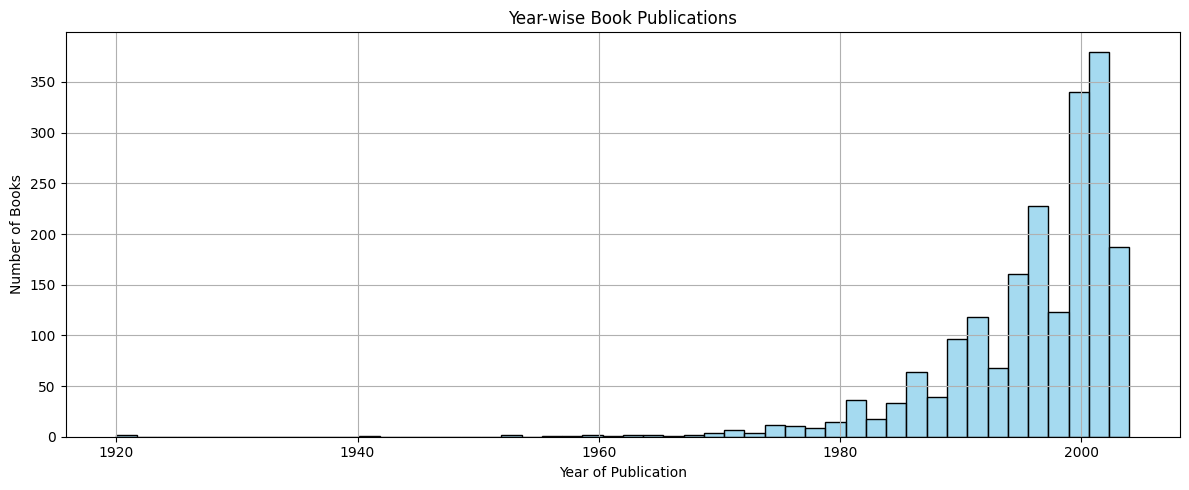

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot1: Year-wise publication histogram

plt.figure(figsize = (12, 5))
sns.histplot(data = books, x = 'Year-Of-Publication', bins = 50, color = 'skyblue')
plt.title('Year-wise Book Publications')
plt.xlabel('Year of Publication')
plt.ylabel('Number of Books')
plt.grid(True)
plt.tight_layout()
plt.show()

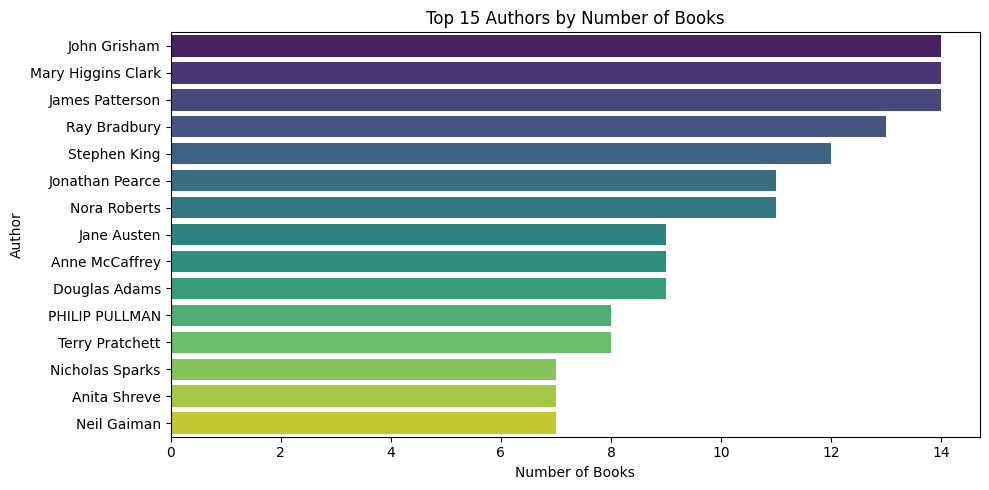

In [25]:
# Plot2: Top 15 authors

top_authors = books['Book-Author'].value_counts().head(15)
plt.figure(figsize=(10, 5))
sns.barplot(x = top_authors.values, y = top_authors.index, palette = 'viridis')
plt.title('Top 15 Authors by Number of Books')
plt.xlabel('Number of Books')
plt.ylabel('Author')
plt.tight_layout()
plt.show()

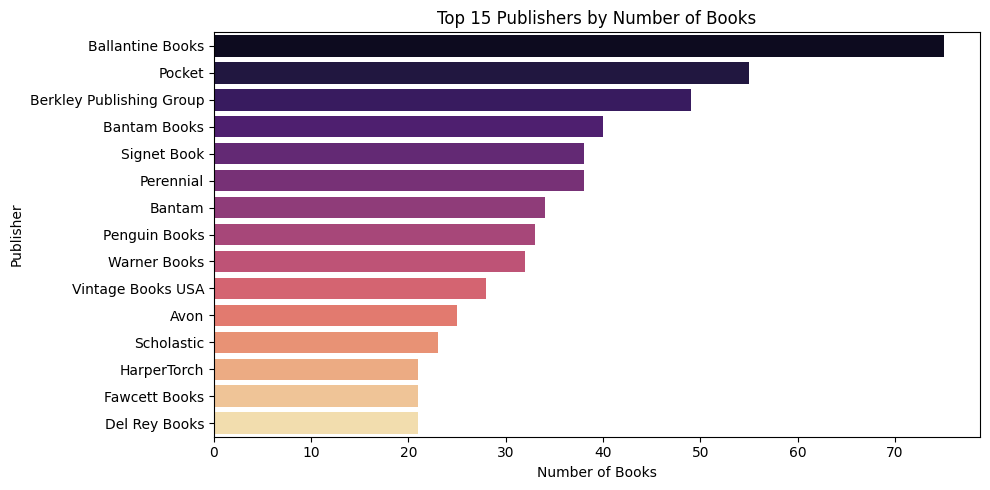

In [26]:
# Plot3: Top 15 publishers

top_publishers = books['Publisher'].value_counts().head(15)
plt.figure(figsize = (10, 5))
sns.barplot(x = top_publishers.values, y = top_publishers.index, palette = 'magma')
plt.title('Top 15 Publishers by Number of Books')
plt.xlabel('Number of Books')
plt.ylabel('Publisher')
plt.tight_layout()
plt.show()

### User dataset(EDA)

In [27]:
# Checking for NULL values
users.isna().sum()

User-ID          0
Location         0
Age         110762
dtype: int64

In [28]:
users['Age'].sort_values().unique()

array([  0.,   1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.,  10.,
        11.,  12.,  13.,  14.,  15.,  16.,  17.,  18.,  19.,  20.,  21.,
        22.,  23.,  24.,  25.,  26.,  27.,  28.,  29.,  30.,  31.,  32.,
        33.,  34.,  35.,  36.,  37.,  38.,  39.,  40.,  41.,  42.,  43.,
        44.,  45.,  46.,  47.,  48.,  49.,  50.,  51.,  52.,  53.,  54.,
        55.,  56.,  57.,  58.,  59.,  60.,  61.,  62.,  63.,  64.,  65.,
        66.,  67.,  68.,  69.,  70.,  71.,  72.,  73.,  74.,  75.,  76.,
        77.,  78.,  79.,  80.,  81.,  82.,  83.,  84.,  85.,  86.,  87.,
        88.,  89.,  90.,  91.,  92.,  93.,  94.,  95.,  96.,  97.,  98.,
        99., 100., 101., 102., 103., 104., 105., 106., 107., 108., 109.,
       110., 111., 113., 114., 115., 116., 118., 119., 123., 124., 127.,
       128., 132., 133., 136., 137., 138., 140., 141., 143., 146., 147.,
       148., 151., 152., 156., 157., 159., 162., 168., 172., 175., 183.,
       186., 189., 199., 200., 201., 204., 207., 20

In [29]:
# Handling NULL values
users = users[users['Age'] <= 90]
users = users[users['Age'] >= 10]

In [30]:
mean = round(users['Age'].mean())

In [31]:
mean

35

In [32]:
users['Age'] = users['Age'].fillna(mean)

In [33]:
users['Age'] = users['Age'].astype(int)

In [34]:
users['Age'].sort_values().unique()

array([10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26,
       27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43,
       44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60,
       61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77,
       78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90])

In [35]:
users.info()

<class 'pandas.core.frame.DataFrame'>
Index: 166597 entries, 1 to 278854
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   User-ID   166597 non-null  int64 
 1   Location  166597 non-null  object
 2   Age       166597 non-null  int32 
dtypes: int32(1), int64(1), object(1)
memory usage: 4.4+ MB


In [36]:
users.reset_index(drop = True, inplace = True)

In [37]:
users.head()

,User-ID,Location,Age
0,2,"stockton, california, usa",18
1,4,"porto, v.n.gaia, portugal",17
2,6,"santa monica, california, usa",61
3,10,"albacete, wisconsin, spain",26
4,11,"melbourne, victoria, australia",14


In [38]:
# Checking for duplicates
users.duplicated().sum()

0

### Visualization (User Dataset)

C:\Users\vighn\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


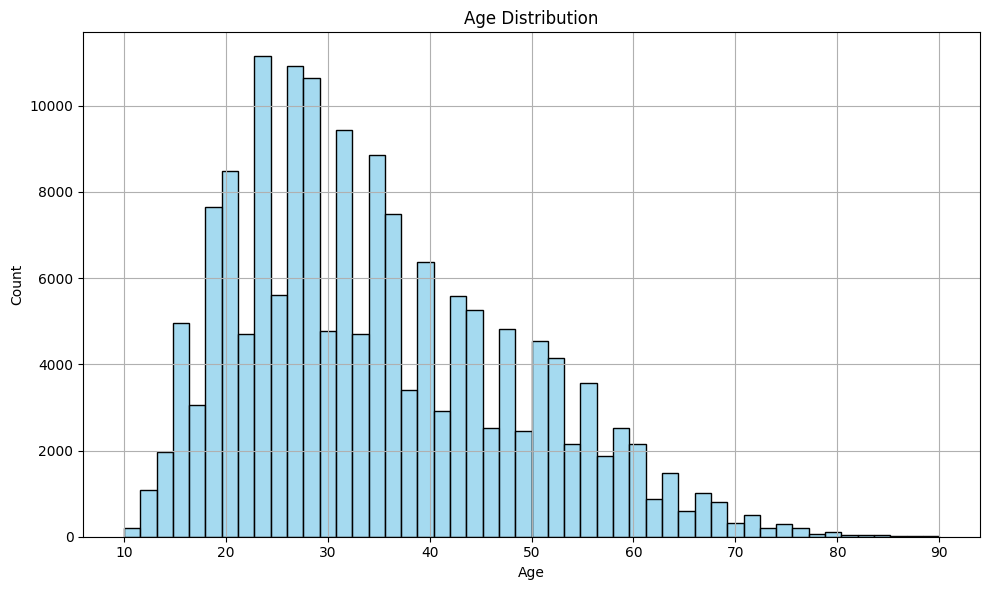

In [39]:
# Plot 4: Age distribution

plt.figure(figsize = (10,6))
sns.histplot(data = users, x = 'Age', bins = 50, color = 'skyblue')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Count')
plt.grid(True)
plt.tight_layout()
plt.show()

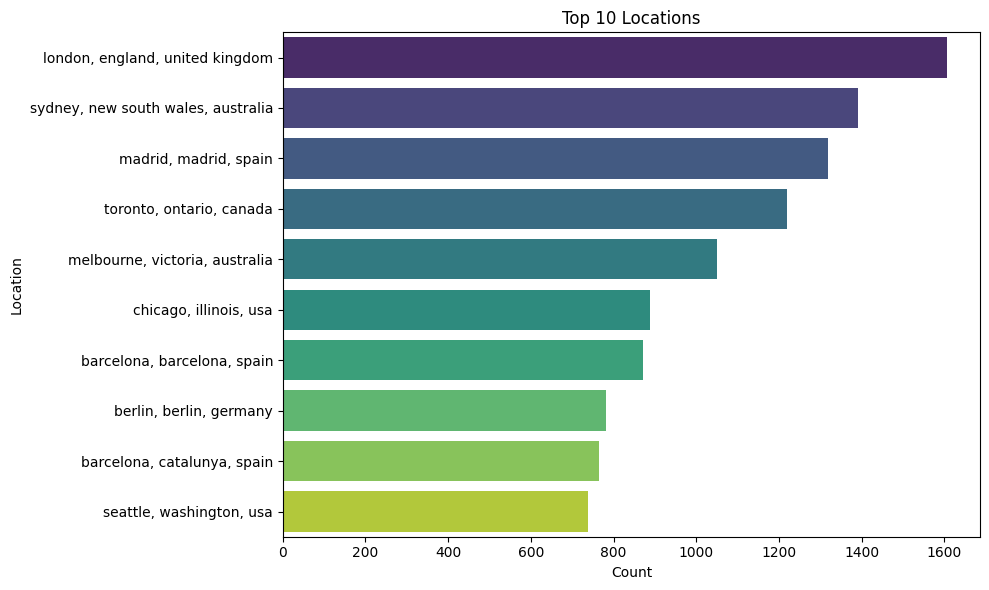

In [40]:
# Plot 5: Top 10 Locations

location = users['Location'].value_counts().head(10)

plt.figure(figsize = (10,6))
sns.barplot(x = location.values, y = location.index, palette = 'viridis')
plt.title('Top 10 Locations')
plt.xlabel('Count')
plt.ylabel('Location')
plt.tight_layout()
plt.show()

### Ratings dataset(EDA)

In [41]:
# Checking for NULL values
ratings.isna().sum()

User-ID        0
ISBN           0
Book-Rating    0
dtype: int64

In [42]:
ratings.dtypes

User-ID         int64
ISBN           object
Book-Rating     int64
dtype: object

In [43]:
ratings.head()

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


In [44]:
# Selecting books whose ratings are not zero
ratings = ratings[ratings['Book-Rating'] != 0]

In [45]:
ratings.reset_index(drop = True, inplace = True)

In [46]:
ratings.head()

,User-ID,ISBN,Book-Rating
0,276726,0155061224,5
1,276729,052165615X,3
2,276729,0521795028,6
3,276736,3257224281,8
4,276737,0600570967,6


### Visualiztion (Ratings Dataset) 

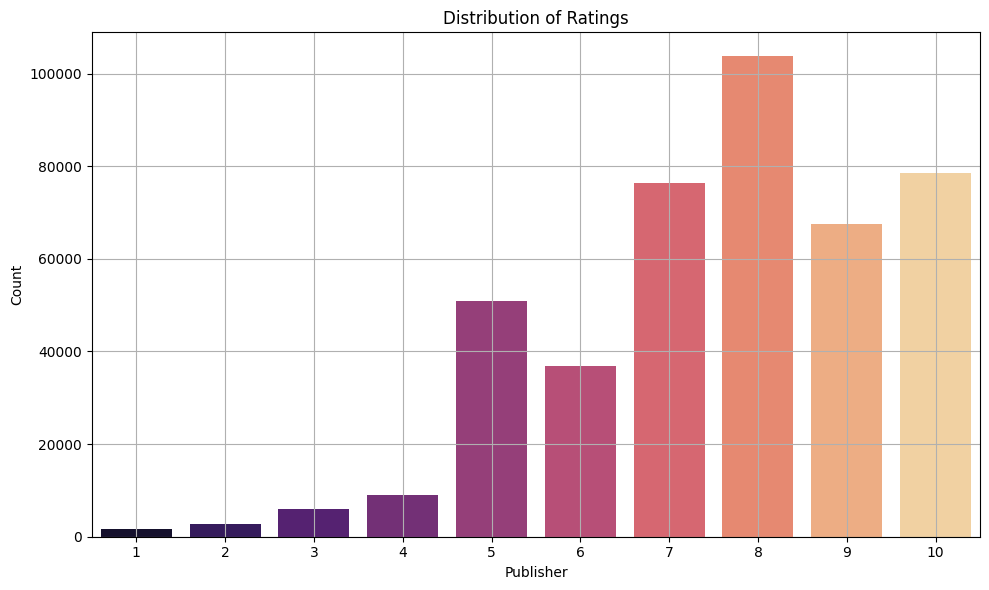

In [47]:
# Plot 6: Distribution of Ratings

top_rating = ratings['Book-Rating'].value_counts().head(10).sort_index()
plt.figure(figsize = (10, 6))
sns.barplot(x = top_rating.index, y = top_rating.values, palette = 'magma')
plt.title('Distribution of Ratings')
plt.xlabel('Publisher')
plt.ylabel('Count')
plt.tight_layout()
plt.grid(True)
plt.show()

In [48]:
# Merge ratings with books on ISBN
merged_df = ratings.merge(books, on='ISBN')

# Filter out 0 ratings (they represent implicit interactions)
merged_df = merged_df[merged_df['Book-Rating'] > 0]

# Count number of ratings per book
top_books = merged_df['Book-Title'].value_counts().head(10)

# Display result
print(top_books)

Book-Title
The Lovely Bones: A Novel                             707
Wild Animus                                           581
The Da Vinci Code                                     487
The Red Tent (Bestselling Backlist)                   383
Divine Secrets of the Ya-Ya Sisterhood: A Novel       320
Life of Pi                                            320
The Secret Life of Bees                               307
Angels &amp; Demons                                   302
Where the Heart Is (Oprah's Book Club (Paperback))    295
A Painted House                                       281
Name: count, dtype: int64


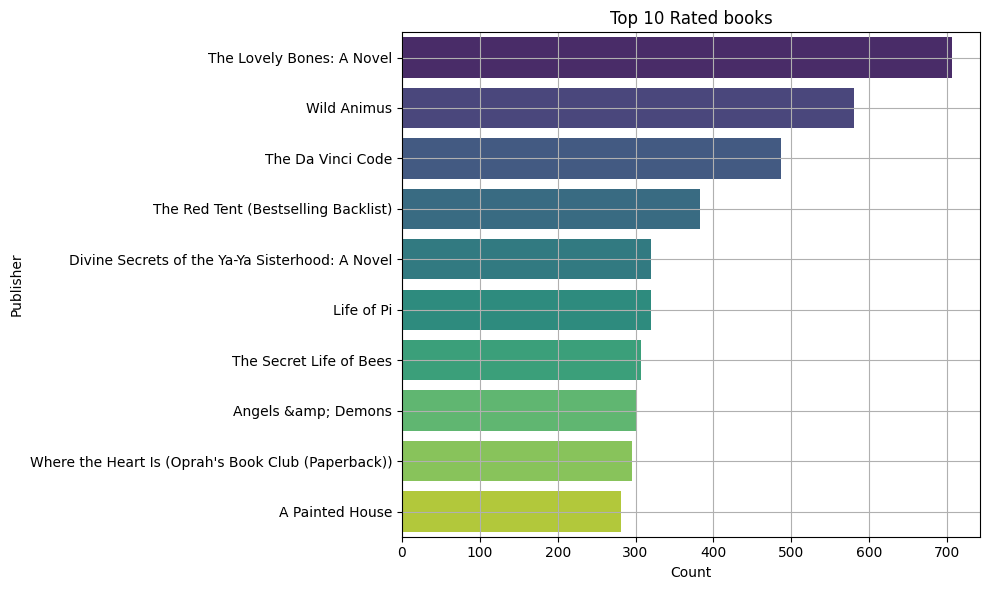

In [49]:
# Plot 6: Distribution of Ratings

plt.figure(figsize = (10, 6))
sns.barplot(x = top_books.values, y = top_books.index, palette = 'viridis')
plt.title('Top 10 Rated books')
plt.xlabel('Count')
plt.ylabel('Publisher')
plt.tight_layout()
plt.grid(True)
plt.show()

### Popularity Based Filtering

In [50]:
ratings_with_books = ratings.merge(books,on='ISBN')

In [51]:
ratings_with_books.isna().sum()

User-ID                0
ISBN                   0
Book-Rating            0
Book-Title             0
Book-Author            0
Year-Of-Publication    0
Publisher              0
Image-URL-S            0
Image-URL-M            0
Image-URL-L            0
dtype: int64

In [52]:
num_rating = ratings_with_books.groupby('Book-Title')['Book-Rating'].count().reset_index()
num_rating.rename(columns={'Book-Rating':'num_ratings'}, inplace = True)
num_rating

,Book-Title,num_ratings
0,101 Dalmatians,6
1,"14,000 Things to Be Happy About",15
2,1st to Die: A Novel,177
3,"20,000 Leagues Under the Sea (Wordsworth Colle...",8
4,2061: Odyssey Three,18
...,...,...
1662,You Can Surf the Net: Your Guide to the World ...,1
1663,You Cannot Be Serious,7
1664,Your Blues Ain't Like Mine,6
1665,Zeit im Wind.,6


In [53]:
num_rating[num_rating['num_ratings']>50]

,Book-Title,num_ratings
2,1st to Die: A Novel,177
5,2nd Chance,59
16,A Heartbreaking Work of Staggering Genius,144
20,A Lesson Before Dying (Vintage Contemporaries ...,83
29,A Painted House,281
...,...,...
1626,While I Was Gone,138
1633,White Oleander : A Novel,52
1635,Who Moved My Cheese? An Amazing Way to Deal wi...,90
1638,Wicked: The Life and Times of the Wicked Witch...,156


In [54]:
avg_rating = ratings_with_books.groupby('Book-Title')['Book-Rating'].mean().reset_index()
avg_rating.rename(columns={'Book-Rating':'avg_rating'}, inplace = True)
avg_rating

,Book-Title,avg_rating
0,101 Dalmatians,9.333333
1,"14,000 Things to Be Happy About",7.200000
2,1st to Die: A Novel,7.728814
3,"20,000 Leagues Under the Sea (Wordsworth Colle...",6.875000
4,2061: Odyssey Three,7.666667
...,...,...
1662,You Can Surf the Net: Your Guide to the World ...,5.000000
1663,You Cannot Be Serious,7.142857
1664,Your Blues Ain't Like Mine,6.333333
1665,Zeit im Wind.,7.000000


In [55]:
popular = num_rating.merge(avg_rating,on='Book-Title')
popular

,Book-Title,num_ratings,avg_rating
0,101 Dalmatians,6,9.333333
1,"14,000 Things to Be Happy About",15,7.200000
2,1st to Die: A Novel,177,7.728814
3,"20,000 Leagues Under the Sea (Wordsworth Colle...",8,6.875000
4,2061: Odyssey Three,18,7.666667
...,...,...,...
1662,You Can Surf the Net: Your Guide to the World ...,1,5.000000
1663,You Cannot Be Serious,7,7.142857
1664,Your Blues Ain't Like Mine,6,6.333333
1665,Zeit im Wind.,6,7.000000


In [56]:
popular = popular[popular['num_ratings']>=50].sort_values('avg_rating',ascending=False).head(50)

In [57]:
popular = popular.merge(books,on='Book-Title').drop_duplicates('Book-Title')[['Book-Title','Book-Author','Image-URL-M','num_ratings','avg_rating']]

In [58]:
#Top 50 popular books based on average rating
popular

,Book-Title,Book-Author,Image-URL-M,num_ratings,avg_rating
0,"The Two Towers (The Lord of the Rings, Part 2)",J.R.R. TOLKIEN,http://images.amazon.com/images/P/0345339711.0...,83,9.120482
1,The Little Prince,Antoine de Saint-ExupÃ©ry,http://images.amazon.com/images/P/0156528207.0...,51,8.980392
2,To Kill a Mockingbird,Harper Lee,http://images.amazon.com/images/P/0446310786.0...,230,8.960870
4,Anne of Green Gables (Anne of Green Gables Nov...,L.M. MONTGOMERY,http://images.amazon.com/images/P/055321313X.0...,53,8.905660
5,The Fellowship of the Ring (The Lord of the Ri...,J.R.R. TOLKIEN,http://images.amazon.com/images/P/0345339703.0...,131,8.839695
6,The Princess Bride: S Morgenstern's Classic Ta...,WILLIAM GOLDMAN,http://images.amazon.com/images/P/0345348036.0...,74,8.837838
7,"Lamb : The Gospel According to Biff, Christ's ...",Christopher Moore,http://images.amazon.com/images/P/0380813815.0...,61,8.786885
8,Anne Frank: The Diary of a Young Girl,ANNE FRANK,http://images.amazon.com/images/P/0553296981.0...,77,8.701299
9,"The Subtle Knife (His Dark Materials, Book 2)",PHILIP PULLMAN,http://images.amazon.com/images/P/0375823468.0...,69,8.666667
12,The Giver (21st Century Reference),LOIS LOWRY,http://images.amazon.com/images/P/0440219078.0...,101,8.663366


### Collaberative Filtering based

In [59]:
x = ratings['User-ID'].value_counts() > 200

In [60]:
x[x].shape

(144,)

In [61]:
y= x[x].index
y

Index([ 11676,  98391, 153662, 189835,  23902,  76499, 171118, 235105,  16795,
       248718,
       ...
        56447,  36606, 245827,  97874,  38023, 269566, 156467, 183995,  60707,
       101209],
      dtype='int64', name='User-ID', length=144)

In [62]:
ratings = ratings[ratings['User-ID'].isin(y)]

In [63]:
ratings.head()

,User-ID,ISBN,Book-Rating
5137,2276,0020960808,10
5138,2276,0030632366,9
5139,2276,0061030643,8
5140,2276,0061098353,8
5141,2276,0061099155,9


In [64]:
ratings.shape

(69226, 3)

In [65]:
ratings_with_books = ratings.merge(books, on='ISBN')

In [66]:
ratings_with_books.shape

(2808, 10)

In [67]:
ratings_with_books.head()

,User-ID,ISBN,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,2276,0345404793,9,Protect and Defend,Richard North Patterson,2001,Ballantine Books,http://images.amazon.com/images/P/0345404793.0...,http://images.amazon.com/images/P/0345404793.0...,http://images.amazon.com/images/P/0345404793.0...
1,2276,0385505833,5,Skipping Christmas,JOHN GRISHAM,2001,Doubleday,http://images.amazon.com/images/P/0385505833.0...,http://images.amazon.com/images/P/0385505833.0...,http://images.amazon.com/images/P/0385505833.0...
2,2276,0425182908,4,Isle of Dogs,Patricia Cornwell,2002,Berkley Publishing Group,http://images.amazon.com/images/P/0425182908.0...,http://images.amazon.com/images/P/0425182908.0...,http://images.amazon.com/images/P/0425182908.0...
3,2276,0440236673,10,The Brethren,John Grisham,2000,Island,http://images.amazon.com/images/P/0440236673.0...,http://images.amazon.com/images/P/0440236673.0...,http://images.amazon.com/images/P/0440236673.0...
4,2276,0441317502,9,Harp and the Blade,John Myers Myers,1985,Ace Books,http://images.amazon.com/images/P/0441317502.0...,http://images.amazon.com/images/P/0441317502.0...,http://images.amazon.com/images/P/0441317502.0...


In [68]:
number_rating = ratings_with_books.groupby('Book-Title')['Book-Rating'].count().reset_index()

In [69]:
number_rating.head()

,Book-Title,Book-Rating
0,101 Dalmatians,2
1,"14,000 Things to Be Happy About",2
2,1st to Die: A Novel,14
3,"20,000 Leagues Under the Sea (Wordsworth Colle...",1
4,2061: Odyssey Three,2


In [70]:
number_rating.rename(columns={'Book-Rating':'num_of_rating'},inplace=True)

In [71]:
number_rating.head()

,Book-Title,num_of_rating
0,101 Dalmatians,2
1,"14,000 Things to Be Happy About",2
2,1st to Die: A Novel,14
3,"20,000 Leagues Under the Sea (Wordsworth Colle...",1
4,2061: Odyssey Three,2


In [72]:
final_rating = ratings_with_books.merge(number_rating, on='Book-Title')

In [73]:
final_rating.head()

,User-ID,ISBN,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L,num_of_rating
0,2276,0345404793,9,Protect and Defend,Richard North Patterson,2001,Ballantine Books,http://images.amazon.com/images/P/0345404793.0...,http://images.amazon.com/images/P/0345404793.0...,http://images.amazon.com/images/P/0345404793.0...,3
1,2276,0385505833,5,Skipping Christmas,JOHN GRISHAM,2001,Doubleday,http://images.amazon.com/images/P/0385505833.0...,http://images.amazon.com/images/P/0385505833.0...,http://images.amazon.com/images/P/0385505833.0...,12
2,2276,0425182908,4,Isle of Dogs,Patricia Cornwell,2002,Berkley Publishing Group,http://images.amazon.com/images/P/0425182908.0...,http://images.amazon.com/images/P/0425182908.0...,http://images.amazon.com/images/P/0425182908.0...,5
3,2276,0440236673,10,The Brethren,John Grisham,2000,Island,http://images.amazon.com/images/P/0440236673.0...,http://images.amazon.com/images/P/0440236673.0...,http://images.amazon.com/images/P/0440236673.0...,15
4,2276,0441317502,9,Harp and the Blade,John Myers Myers,1985,Ace Books,http://images.amazon.com/images/P/0441317502.0...,http://images.amazon.com/images/P/0441317502.0...,http://images.amazon.com/images/P/0441317502.0...,1


In [74]:
final_rating.shape

(2808, 11)

In [75]:
final_rating = final_rating[final_rating['num_of_rating'] >= 50]

In [76]:
final_rating.head()

,User-ID,ISBN,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L,num_of_rating


In [77]:
final_rating.shape

(0, 11)

In [78]:
final_rating.drop_duplicates(['User-ID','Book-Title'],inplace=True)

,User-ID,ISBN,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L,num_of_rating


In [79]:
final_rating.shape

(0, 11)

In [80]:
book_pivot = final_rating.pivot_table(columns='User-ID', index='Book-Title', values= 'Book-Rating')

In [81]:
book_pivot

User-ID
Book-Title


In [82]:
book_pivot.fillna(0, inplace=True)

In [83]:
book_pivot

User-ID
Book-Title


In [84]:
print(ratings.shape)
print(ratings.head())

(69226, 3)
      User-ID        ISBN  Book-Rating
5137     2276  0020960808           10
5138     2276  0030632366            9
5139     2276  0061030643            8
5140     2276  0061098353            8
5141     2276  0061099155            9


In [85]:
book_pivot = ratings.pivot_table(index='ISBN', columns='User-ID', values='Book-Rating')
print(book_pivot.shape)

(53817, 144)


In [86]:
book_counts = ratings['ISBN'].value_counts()
print((book_counts >= 50).sum())  # number of books with >= 50 ratings

0


In [87]:
popular_books = book_counts[book_counts >= 20].index
filtered_ratings = ratings[ratings['ISBN'].isin(popular_books)]

In [88]:
book_pivot = filtered_ratings.pivot_table(index='ISBN', columns='User-ID', values='Book-Rating').fillna(0)
print(book_pivot.shape)  # this should now be non-empty

(2, 41)


In [89]:
user_counts = ratings['User-ID'].value_counts()
active_users = user_counts[user_counts >= 10].index
filtered_ratings = filtered_ratings[filtered_ratings['User-ID'].isin(active_users)]

In [90]:
from sklearn.metrics.pairwise import cosine_similarity

similarity_scores = cosine_similarity(book_pivot)

In [91]:
book_pivot = ratings.pivot_table(
    index="User-ID",
    columns="ISBN",
    values="Book-Rating",
    fill_value=0
)

print("Pivot shape:", book_pivot.shape)


Pivot shape: (144, 53817)


In [92]:
#Filter books with ≥ 30 ratings
book_counts = ratings['ISBN'].value_counts()
popular_books = book_counts[book_counts >= 30].index
ratings = ratings[ratings['ISBN'].isin(popular_books)]

#Filter users with ≥ 10 ratings
user_counts = ratings['User-ID'].value_counts()
active_users = user_counts[user_counts >= 10].index
ratings = ratings[ratings['User-ID'].isin(active_users)]

In [93]:
book_pivot = ratings.pivot_table(index='ISBN', columns='User-ID', values='Book-Rating').fillna(0)
print(book_pivot.shape)  # Should show (n_books, n_users) > (0, 0)

(0, 0)


In [94]:
# Use more lenient thresholds
book_counts = ratings['ISBN'].value_counts()
popular_books = book_counts[book_counts >= 10].index  # try 10 instead of 30

user_counts = ratings['User-ID'].value_counts()
active_users = user_counts[user_counts >= 5].index     # try 5 instead of 10

# Filter again
filtered_ratings = ratings[
    ratings['ISBN'].isin(popular_books) &
    ratings['User-ID'].isin(active_users)
]

In [95]:
book_pivot = filtered_ratings.pivot_table(
    index='ISBN',
    columns='User-ID',
    values='Book-Rating'
).fillna(0)

print("Pivot shape:", book_pivot.shape)

Pivot shape: (0, 0)


In [96]:
ratings_df = pd.read_csv("Ratings.csv", encoding="latin-1")
ratings_df.columns = ['User-ID', 'ISBN', 'Book-Rating']

# Keep only non-zero (explicit) ratings
ratings_df = ratings_df[ratings_df['Book-Rating'] > 0]

In [97]:
print("Total ratings:", len(ratings_df))
print("Unique books:", ratings_df['ISBN'].nunique())
print("Unique users:", ratings_df['User-ID'].nunique())

Total ratings: 433671
Unique books: 185973
Unique users: 77805


In [98]:
book_counts = ratings_df['ISBN'].value_counts()
popular_books = book_counts[book_counts >= 50].index

In [99]:
user_counts = ratings_df['User-ID'].value_counts()
active_users = user_counts[user_counts >= 10].index

In [100]:
filtered_df = ratings_df[
    ratings_df['ISBN'].isin(popular_books) &
    ratings_df['User-ID'].isin(active_users)
]

In [101]:
print("Unique books:", filtered_df['ISBN'].nunique())
print("Unique users:", filtered_df['User-ID'].nunique())

Unique books: 537
Unique users: 5371


In [102]:
book_pivot = filtered_df.pivot_table(
    index='ISBN',
    columns='User-ID',
    values='Book-Rating',
    aggfunc='mean'
).fillna(0)

print("Pivot shape:", book_pivot.shape)

Pivot shape: (537, 5371)


In [103]:
from scipy.sparse import csr_matrix

book_sparse = csr_matrix(book_pivot.values)

In [104]:
from sklearn.metrics.pairwise import cosine_similarity

similarity_scores = cosine_similarity(book_sparse)

In [105]:
# Index mappings
isbn_list = book_pivot.index.tolist()
isbn_to_idx = {isbn: idx for idx, isbn in enumerate(isbn_list)}
idx_to_isbn = {idx: isbn for idx, isbn in enumerate(isbn_list)}

In [106]:
def recommend_books(target_isbn, top_n=5):
    if target_isbn not in isbn_to_idx:
        return f"ISBN {target_isbn} not found in the dataset."

    # Get index of the target book
    idx = isbn_to_idx[target_isbn]

    # Get similarity scores for that book
    sim_scores = list(enumerate(similarity_scores[idx]))

    # Sort by similarity (excluding itself)
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    top_books = sim_scores[1:top_n+1]  # Skip the first one (itself)

    # Get corresponding ISBNs
    recommendations = [(idx_to_isbn[i], round(score, 3)) for i, score in top_books]
    return recommendations

In [107]:
print(recommend_books('0971880107', top_n=5))

[('1844262553', 0.093), ('0060199652', 0.081), ('0679731148', 0.076), ('0446612790', 0.074), ('0743412028', 0.071)]


In [108]:
# Ensure ISBN is a string in both DataFrames
books['ISBN'] = books['ISBN'].astype(str)

# Create ISBN → Title mapping
isbn_to_title = books.set_index('ISBN')['Book-Title'].to_dict()

In [109]:
def recommend_books_with_titles(target_isbn, top_n=5):
    if target_isbn not in isbn_to_idx:
        return f"ISBN {target_isbn} not found in the dataset."

    idx = isbn_to_idx[target_isbn]
    sim_scores = list(enumerate(similarity_scores[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    top_books = sim_scores[1:top_n+1]

    recommendations = []
    for i, score in top_books:
        isbn = idx_to_isbn[i]
        title = isbn_to_title.get(isbn, "Unknown Title")
        recommendations.append((title, round(score, 3)))

    return recommendations


In [110]:
def recommend_books(isbn, top_n=5):
    if isbn not in isbn_to_idx:
        return f"❌ ISBN '{isbn}' not found."

    idx = isbn_to_idx[isbn]
    sim_scores = list(enumerate(similarity_scores[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)[1:top_n+1]

    results = []
    for i, score in sim_scores:
        similar_isbn = idx_to_isbn[i]
        title = isbn_to_title.get(similar_isbn, "Unknown Title")
        results.append((title, round(score, 3)))
    return results

In [111]:
def recommend(book_name, top_n=5):
    try:
        index = np.where(book_pivot.index == book_name)[0][0]
        similar_items = sorted(
            list(enumerate(similarity_scores[index])),
            key=lambda x: x[1],
            reverse=True
        )[1 : top_n + 1]

        results = [(book_pivot.index[i], round(score, 3)) for i, score in similar_items]
        return results
    except IndexError:
        return []

In [112]:
def recommend_by_title(title, top_n=5):
    isbn = None
    for k, v in isbn_to_title.items():
        if v == title:
            isbn = k
            break
    if not isbn or isbn not in book_pivot.index:
        return []

    index = np.where(book_pivot.index == isbn)[0][0]
    similar_items = sorted(
        list(enumerate(similarity_scores[index])),
        key=lambda x: x[1],
        reverse=True
    )[1 : top_n + 1]

    results = []
    for i, score in similar_items:
        similar_isbn = book_pivot.index[i]
        similar_title = isbn_to_title.get(similar_isbn, "Unknown Title")
        results.append((similar_title, round(score, 3)))
    return results

In [113]:
def recommend_books_with_images(isbn, top_n=5):
    try:
        index = np.where(book_pivot.index == isbn)[0][0]
    except IndexError:
        return []

    similar_items = sorted(
        list(enumerate(similarity_scores[index])),
        key=lambda x: x[1],
        reverse=True
    )[1 : top_n + 1]

    results = []
    for i, score in similar_items:
        similar_isbn = book_pivot.index[i]
        similar_title = isbn_to_title.get(similar_isbn, "Unknown Title")
        book_info = books[books["ISBN"] == similar_isbn].drop_duplicates("ISBN")
        if not book_info.empty:
            author = book_info["Book-Author"].values[0]
            image = book_info["Image-URL-M"].values[0]
            results.append((similar_title, author, image, round(score, 3)))
    return results

In [114]:
def get_popular_books(n=5):
    books_filtered = books[books["ISBN"].isin(valid_isbn)]
    popular = (
        books_filtered.groupby("Book-Title")
        .agg({"Book-Rating": "mean", "ISBN": "count"})
        .rename(columns={"ISBN": "Rating-Count"})
        .sort_values(["Rating-Count", "Book-Rating"], ascending=False)
        .head(n)
        .reset_index()
    )
    return popular

In [115]:
print(recommend_books_with_images('0971880107'))

[('A Year in Provence', 'Peter Mayle', 'http://images.amazon.com/images/P/0679731148.01.MZZZZZZZ.jpg', 0.076)]


In [116]:
print(recommend_by_title('A Year in Provence'))

[('Unknown Title', 0.144), ('The Phantom Tollbooth', 0.126), ('Unknown Title', 0.121), ('Unknown Title', 0.118), ('Unknown Title', 0.113)]


In [117]:
# Using recommend_books_with_images and get_popular_books function for deployment

In [118]:
import pickle

# Save everything needed
data = {
    "book_pivot": book_pivot,
    "similarity_scores": similarity_scores,
    "isbn_to_idx": isbn_to_idx,
    "idx_to_isbn": idx_to_isbn,
    "isbn_to_title": isbn_to_title
}

with open("recommendation_data.pkl", "wb") as f:
    pickle.dump(data, f)

print("Data saved to recommendation_data.pkl")

Data saved to recommendation_data.pkl


### Needed to Downsample / Reduce rows in order for all files to meet the 25Mb size limit for Github

In [119]:
#import pandas as pd

#n_rows = 2000 

#books_sample = pd.read_csv("Books.csv", nrows=n_rows)

#books_sample.to_csv("Books_sample.csv", index=False)
#print("Books_sample.csv shape:", books_sample.shape)

In [120]:
pip install pandas==2.3.3

Note: you may need to restart the kernel to use updated packages.


In [121]:
pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.
